In [1]:

import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal, multivariate_t, chi2

import networkx as nx
import yfinance as yf
import sys
sys.path.insert(0, 'C:/Users/User/Code/DyGraph')

import DyGraph as dg
import port_measures as pm
import tqdm
import pickle
from collections import defaultdict
import scipy.integrate as integrate
import yfinance as yf
from scipy.stats import norm, kurtosis,t, nct

In [30]:
def generate_gen_skew_t(Sigma, gamma, nu, n):
    from scipy.stats import uniform

    T = lambda u: np.array([chi2.ppf(u, df = nu[k])/nu[k] for k in range(len(nu))])

    d = Sigma.shape[0]
    x = np.random.multivariate_normal(mean = np.zeros(d),cov = Sigma, size = n)
    y = np.zeros(shape = (n, d))

    V = np.zeros(shape = (n, d))

    for i in range(n):


        u = uniform.rvs()
        y[i] = np.reciprocal(T(u))*gamma  + np.sqrt(np.reciprocal(T(u)))*x[i]
        V[i] = T(u)

    return y, V


In [103]:
x_gt = t.ppf(np.linspace(0.00001, 0.9999, 10000),df = 4, loc = 0, scale = 1)

x_n = norm.ppf(np.linspace(0.00001, 0.9999, 10000), loc = 0, scale = 1)
x_st = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 4, nc = 0.7, loc = 0, scale = 1)



(-10.0, 10.0)

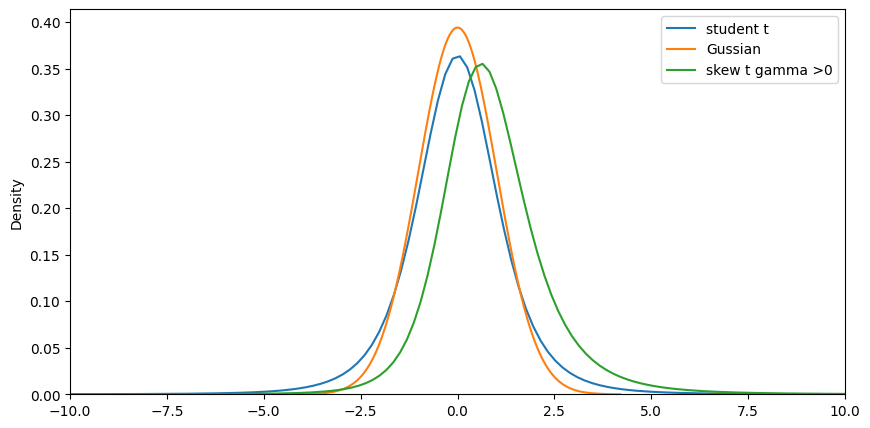

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(x_gt,ax =ax)
sns.kdeplot(x_n,ax =ax)
sns.kdeplot(x_st,ax =ax)
ax.legend(["student t", "Gussian", "skew t gamma >0", "skew t gamma <0"])
ax.set_xlim([-10,10])

Effect of degree of freedoms

(-5.0, 5.0)

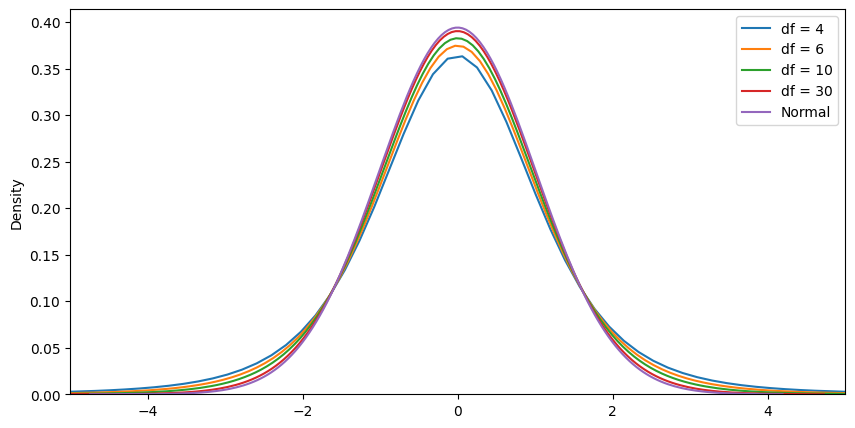

In [92]:
x_4 = t.ppf(np.linspace(0.00001, 0.9999, 10000),df = 4, loc = 0, scale = 1)
x_6 = t.ppf(np.linspace(0.00001, 0.9999, 10000),df = 6, loc = 0, scale = 1)
x_10 = t.ppf(np.linspace(0.00001, 0.9999, 10000),df = 10, loc = 0, scale = 1)
x_30 = t.ppf(np.linspace(0.00001, 0.9999, 10000),df = 30, loc = 0, scale = 1)
x_n = norm.ppf(np.linspace(0.00001, 0.9999, 10000), loc = 0, scale = 1)
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(x_4,ax =ax)
sns.kdeplot(x_6,ax =ax)
sns.kdeplot(x_10,ax =ax)
sns.kdeplot(x_30,ax =ax)
sns.kdeplot(x_n,ax =ax)
ax.legend(["df = 4", "df = 6", "df = 10", "df = 30", "Normal"])
ax.set_xlim([-5,5])

effect of skew

(-5.0, 10.0)

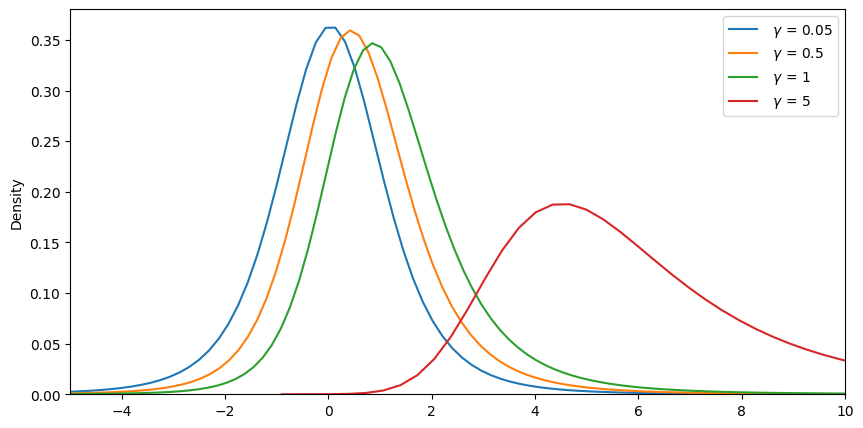

In [101]:
x_1 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 4, nc = 0.05, loc = 0, scale = 1)
x_2 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 4, nc = 0.5, loc = 0, scale = 1)
x_3 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 4, nc = 1, loc = 0, scale = 1)
x_4 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 4, nc = 5, loc = 0, scale = 1)
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(x_1,ax =ax)
sns.kdeplot(x_2,ax =ax)
sns.kdeplot(x_3,ax =ax)
sns.kdeplot(x_4,ax =ax)
ax.legend([r" $\gamma$ = 0.05", r" $\gamma$ = 0.5", r" $\gamma$ = 1", r" $\gamma$ = 5"])
ax.set_xlim([-5,10])

(-10.0, 5.0)

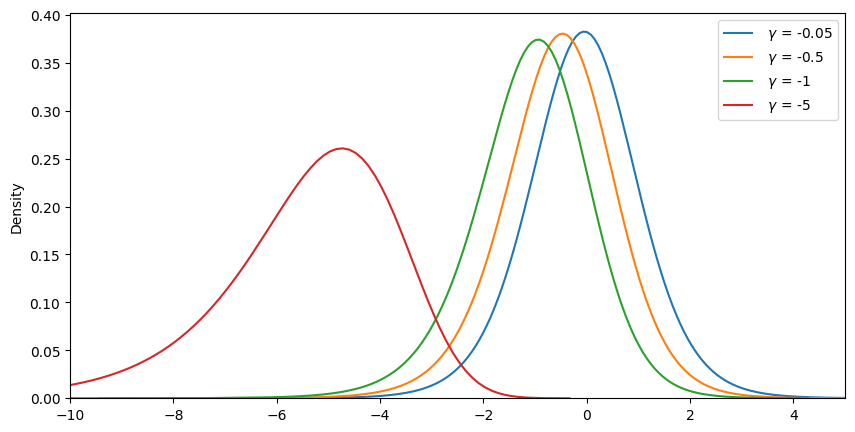

In [100]:
x_1 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 10, nc = -0.05, loc = 0, scale = 1)
x_2 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 10, nc = -0.5, loc = 0, scale = 1)
x_3 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 10, nc = -1, loc = 0, scale = 1)
x_4 = nct.ppf(np.linspace(0.00001, 0.9999, 10000), df = 10, nc = -5, loc = 0, scale = 1)
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(x_1,ax =ax)
sns.kdeplot(x_2,ax =ax)
sns.kdeplot(x_3,ax =ax)
sns.kdeplot(x_4,ax =ax)
ax.legend([r" $\gamma$ = -0.05", r" $\gamma$ = -0.5", r" $\gamma$ = -1", r" $\gamma$ = -5"])
ax.set_xlim([-10,5])

compare with financial data

In [62]:
with open(f'../data/case_study_etf/raw_etf.pkl', 'rb') as handle:
    data = pickle.load(handle)

ticker_list = data['ticker_list']
#log_returns = data['log_returns']
log_returns_scaled = data['log_returns_scaled']
price = data['price']
groups = data['groups']

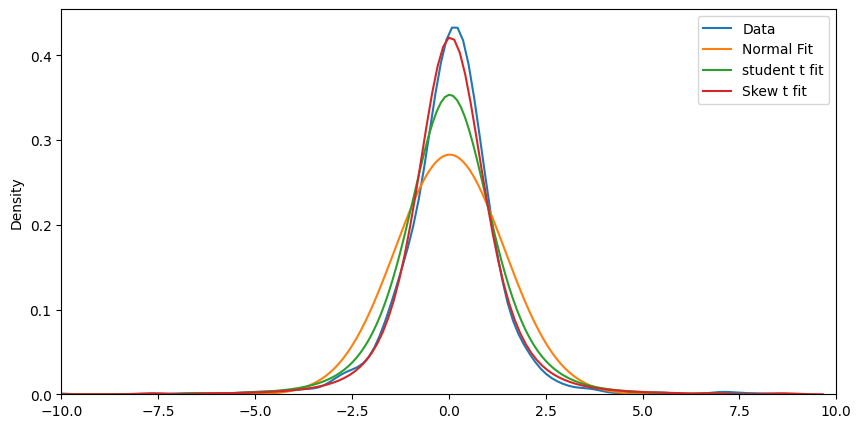

In [83]:
y = np.array(log_returns_scaled.iloc[:,0])
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(y,ax =ax)
ax.set_xlim([-10,10])

# normal fit
mu_normal = np.mean(y)
var_normal = np.mean((y-mu_normal) ** 2)
normal_fit = norm.ppf(np.linspace(0.0001,0.999,1000), mu_normal, np.sqrt(var_normal))
sns.kdeplot(normal_fit,ax =ax)

# student t fit
m = np.mean(y)
v = (4*kurtosis(y) - 6)/(kurtosis(y)-3)
s = np.sqrt( (np.std(y) ** 2)* (v-2) / v)

t_fit = t.ppf(np.linspace(0.0001,0.999,1000), df = v, loc = m, scale = s)
sns.kdeplot(t_fit,ax =ax)

# skew t fit
params = nct.fit(y, floc = 0)
nct_fit = nct.ppf(np.linspace(0.0001,0.999,1000), df = params[0], nc = params[1], loc = params[2], scale = params[3])
sns.kdeplot(nct_fit,ax =ax)

ax.legend(["Data", "Normal Fit", "student t fit", "Skew t fit"])

log_returns_scale[']

In [2]:
def log_lik(mean,cov, X, liktype, nu = None):

    if liktype == "gaussian":
        lik = np.sum(multivariate_normal.logpdf(X, mean=mean, cov=cov, allow_singular=True))
    elif liktype == "t":
        lik = np.sum(multivariate_t.logpdf(X,loc = mean, shape=cov, df = nu))
    else:
        assert False, "likelihood not correct"

    return lik


In [3]:
with open(f'../data/case_study_etf/raw_etf.pkl', 'rb') as handle:
    data = pickle.load(handle)

ticker_list = data['ticker_list']
#log_returns = data['log_returns']
log_returns_scaled = data['log_returns_scaled']
price = data['price']
groups = data['groups']

In [20]:
i  = 600
x = log_returns_scaled.iloc[i-500:i,]
np.array(np.mean(x,0))


array([ 0.01152951,  0.05464149,  0.041279  ,  0.0846349 ,  0.06890103,
        0.09788659, -0.0024331 ,  0.01603781,  0.03811832,  0.06282164,
        0.04994949])

Fit a static Gaussian and Static t. Compare AIC

In [26]:
dg_opt_t.nu[-1]

5.726132665053208

In [28]:
max_iter = 1000
obs_per_graph = x.shape[0]
alpha = 0.5
tol = 1e-8
mu = np.array(np.mean(x,0))
l = 20

dg_opt_t = dg.sgl(max_iter = max_iter, lamda = obs_per_graph*alpha, tol = tol)
dg_opt_t.fit(x,  lik_type='t', nu = None,verbose=True, 
        theta_init= None, groups = groups)


# get precision/covariance
precision_matrix = dg_opt_t.theta[-1].copy()
precision_matrix[np.abs(precision_matrix)<1e-5]= 0.0
S = np.linalg.inv(precision_matrix)

C = (dg_opt_t.nu[-1]/(dg_opt_t.nu[-1]-2))
S_t = C*S

# Update precision matrix 
precision_matrix_t = np.linalg.inv(S) 



# portfolio weights sharpe
w_s, mu_s, var_s = pm.portfolio_opt(S,precision_matrix_t, mu, x, type = 'sharpe')
print(w_s)
portfolio_s = np.dot(price.iloc[i:i + l],w_s)
log_returns_s = np.array(100*np.log(1+pd.DataFrame(portfolio_s).pct_change()).dropna())
r_s = (portfolio_s[-1]-portfolio_s[0])/portfolio_s[0]
print(r_s)
sigma_s = np.std(log_returns_s)
sharpe_s = pm.sharpe(r_s,sigma_s)
print(sharpe_s)

print(log_lik(np.zeros(x.shape[1]) ,np.linalg.inv(dg_opt_t.theta[-1]), x-mu, liktype = 't', nu =dg_opt_t.nu[-1]))

dg_opt_n = dg.sgl(max_iter = max_iter, lamda = obs_per_graph*alpha, tol = tol)
dg_opt_n.fit(x,  lik_type='gaussian', nu = None,verbose=True, 
        theta_init= None, groups = groups)



# get precision/covariance
precision_matrix = dg_opt_n.theta[-1].copy()
precision_matrix[np.abs(precision_matrix)<1e-5]= 0.0
S = np.linalg.inv(precision_matrix)

C = 1
S = C*S

# Update precision matrix 
precision_matrix = np.linalg.inv(S) 



# portfolio weights sharpe
w_s, mu_s, var_s = pm.portfolio_opt(S,precision_matrix, mu, x, type = 'sharpe')
print(w_s)

portfolio_s = np.dot(price.iloc[i:i + l],w_s)
log_returns_s = np.array(100*np.log(1+pd.DataFrame(portfolio_s).pct_change()).dropna())
r_s = (portfolio_s[-1]-portfolio_s[0])/portfolio_s[0]
print(r_s)
sigma_s = np.std(log_returns_s)
sharpe_s = pm.sharpe(r_s,sigma_s)
print(sharpe_s)

log_lik(np.zeros(x.shape[1]) ,np.linalg.inv(dg_opt_n.theta[-1]), x-mu, liktype = 'gaussian')

Error 1.00E-8:  96%|█████████▌| 959/1000 [00:01<00:00, 653.12it/s]


[ 0.02097413  0.10576214  0.03858825  0.12685646  0.17483191  0.20269656
 -0.00700007  0.02477274  0.0821398   0.17225232  0.05812577]
0.020183686484127793
0.03622700437799972
-6032.771296975441


Error 1.05E-8:  10%|▉         | 98/1000 [00:00<00:00, 962.81it/s]

[ 0.02772057  0.10479051  0.05158417  0.1227276   0.15330765  0.1814955
 -0.00810234  0.03497289  0.08869331  0.16421174  0.07859841]
0.02067582145811833
0.038108555497479636


-6983.504633220613